___
# Ciência dos Dados - PROJETO 1

## Luca Farah dos Santos
___

## Internet móvel e fixa relacionada a renda e região

___
## Introdução


Com esse projeto pretendo analisar como o acesso a internet fixa e móvel varia conforme a renda. Com isso poderei analisar se existe realmente uma relação entre a renda e o acesso a internet, ou se a internet realmente é algo sem desigualdade social.

Também pretendo comparar regiões urbanas e rurais para que assim seja possível comprovar ou desprovar a ideia de que zonas rural tem menos acesso a rede. 

Por ultimo pretendo compreender se o acesso a internet cresceu de maneira expressiva durante a duração de 3 anos(2015,2014,2013)

### Pergunta: 
#### Como o acesso a internet(móvel e doméstica) varia de acordo com a renda per capita? Como isso varia quando comparamos regiões urbanas e rurais?

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/lucafarahdossantos/Desktop/Programacao/ciência dos dados/Projeto-1-ciencia-dos-dados


# 2015

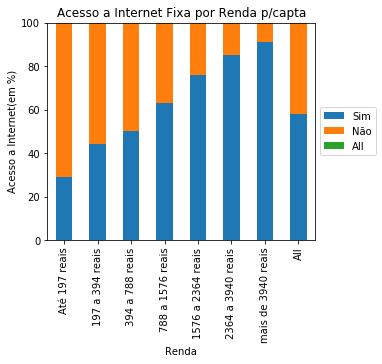

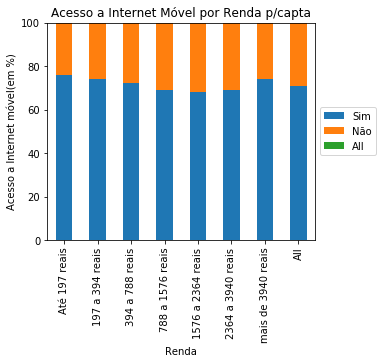

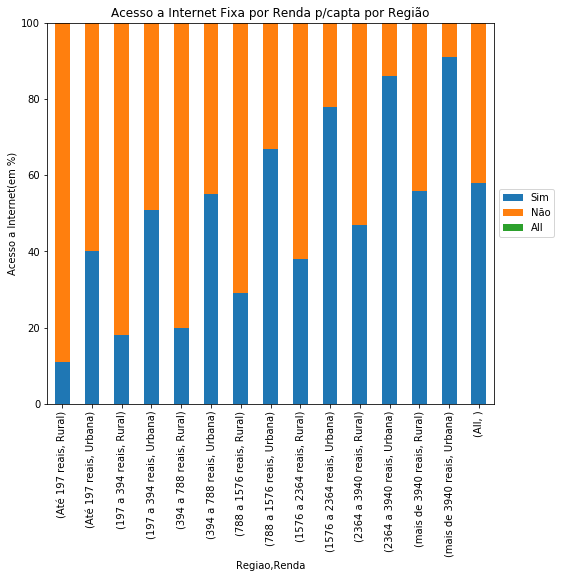

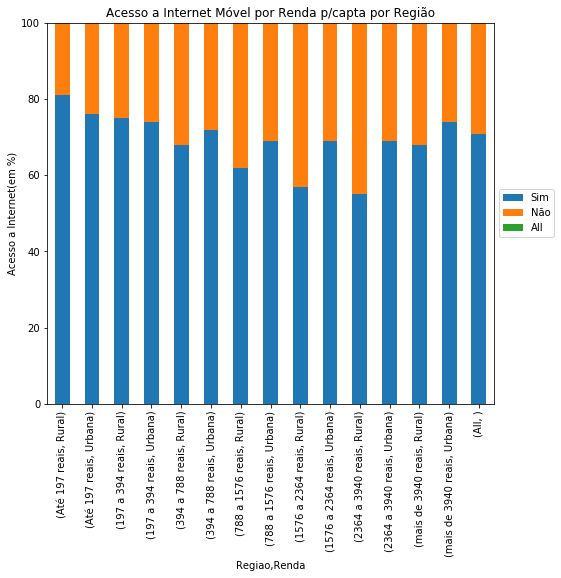

In [3]:
#Se usar o arquivo descompactado
dados=pd.read_csv('DOM2015.csv',sep=',')
dados15=dados[(dados.V4622 > 0) & (dados.V4622 < 9)]

def UrbanoRural(linha):
    if(linha==1 or linha==2 or linha==3):
        return "Urbana"
    if (linha ==3 or linha==4 or linha==5 or linha==6 or linha==7 or linha==8):
        return "Rural"
df=pd.DataFrame({'Renda':dados15.V4622,'Regiao':dados15.V4105,
                 'O acesso à 3G ou 4G':dados15.V02424,'Internet':dados15.V02322})
df.Internet = df.Internet.astype('category')
df.Renda = df.Renda.astype('category')
df.Renda.cat.categories=('Até 197 reais','197 a 394 reais','394 a 788 reais','788 a 1576 reais','1576 a 2364 reais','2364 a 3940 reais','mais de 3940 reais')
df['O acesso à 3G ou 4G'] = df['O acesso à 3G ou 4G'].astype('category')
df['O acesso à 3G ou 4G'].cat.categories = ('Sim','Não')
df.Internet.cat.categories = ('Sim','Não')
df.dropna()
df.Regiao=df.Regiao.apply(UrbanoRural)



def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)
ct=pd.crosstab(df.Internet,df.Renda,margins=True,rownames=['Internet'], colnames=['Renda']).apply(percConvert, axis=0)
ct = ct.iloc[0:5,:]
plot = ct.iloc[0:3,].T.plot(kind='bar', stacked=True,title='Acesso a Internet Fixa por Renda p/capta')
plot.set_ylim([0, 100])
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    


plt.ylabel('Acesso a Internet(em %)')
ct2=pd.crosstab(df['O acesso à 3G ou 4G'],df.Renda,margins=True,rownames=['Internet'], colnames=['Renda']).apply(percConvert, axis=0)
ct2 = ct2.iloc[0:5,:]
plot = ct2.iloc[0:3,].T.plot(kind='bar', stacked=True,title='Acesso a Internet Móvel por Renda p/capta')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet móvel(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ct3=pd.crosstab(df.Internet,[df.Renda,df.Regiao],margins=True,rownames=['Internet'], colnames=['Regiao','Renda']).apply(percConvert, axis=0)
ct3 = ct3.iloc[0:5,:]
ct3
plot = ct3.iloc[0:3,].T.plot(kind='bar',figsize=(10,7), stacked=True,title='Acesso a Internet Fixa por Renda p/capta por Região')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ct4=pd.crosstab(df['O acesso à 3G ou 4G'],[df.Renda,df.Regiao],margins=True,rownames=['Internet'],colnames=['Regiao','Renda']).apply(percConvert, axis=0)
ct4 = ct4.iloc[0:5,:]
ct4
plot = ct4.iloc[0:3,].T.plot(kind='bar',figsize=(10,7), stacked=True,title='Acesso a Internet Móvel por Renda p/capta por Região')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))






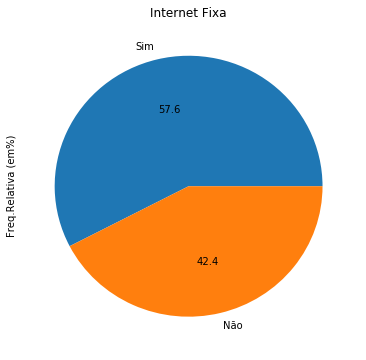

In [4]:
Internet = (df.Internet.value_counts(normalize=True)*100).round(decimals=1)
plot = Internet.plot(kind='pie',title='Internet Fixa',autopct='%.1f',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em%)')

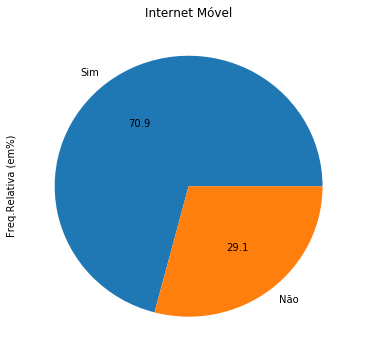

In [5]:
InternetMovel = (df['O acesso à 3G ou 4G'].value_counts(normalize=True)*100).round(decimals=1)
plot = InternetMovel.plot(kind='pie',title='Internet Móvel',autopct='%.1f',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em%)')

# Análise e Resultados 2015


Analisando o primeiro gráfico podemos notar que quanto maior a renda, maior a porcentagem de pessoas com acesso internet fixa. No entanto surpreendentemente o gráfico de internet conta uma história diferente, nele podemos notar que a porcentagem de pessoas que tem acesso a internet móvel permanece praticamente constante, mostrando que a renda não esta relacionado ao as pessoas que não tem internet móvel.

Quando analisamos os gráficos de Região podemos notar que o comportamento de que a zona rural tem menos acesso a internet do que a urbana foi comprovado. No entanto quando analisamos os dados de internet móvel notamos que esse comportamento não se repete, em algumas faixas de renda como "até 197 reais' existe uma maior porcentagem com internet móvel na zona rural do que na urbana.

Os gráficos de setores serão usados para uma comparação no final.

# 2014

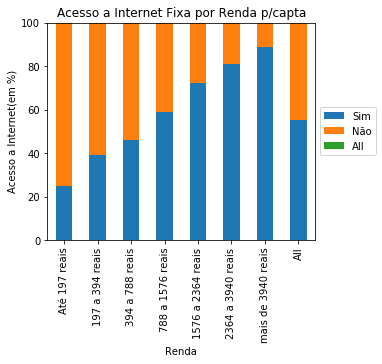

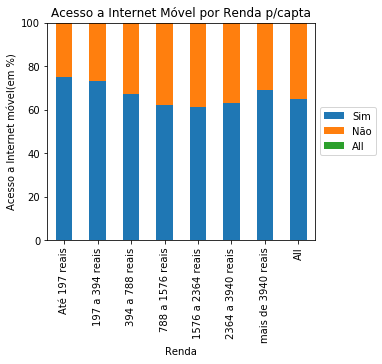

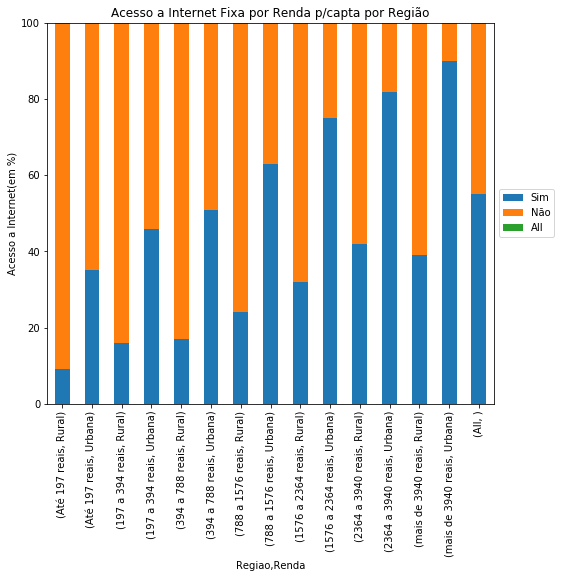

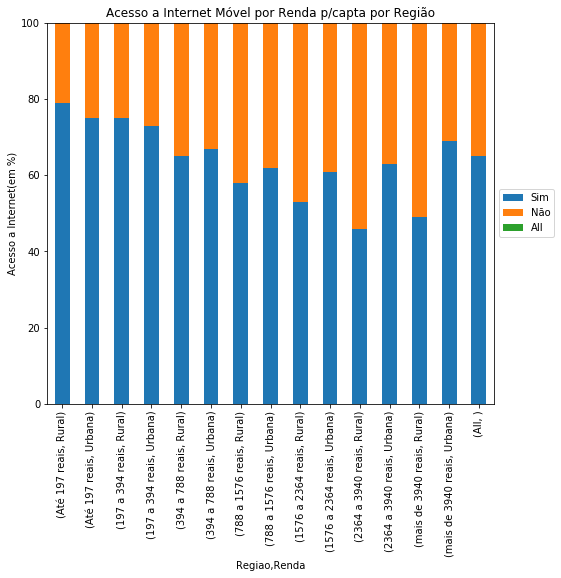

In [6]:
dados=pd.read_csv('DOM2014.csv',sep=',')
dados15=dados[(dados.V4622 > 0) & (dados.V4622 < 9)]

df=pd.DataFrame({'Renda':dados15.V4622,'Regiao':dados15.V4105,
                 'O acesso à 3G ou 4G':dados15.V02424,'Internet':dados15.V02322})
df.Internet = df.Internet.astype('category')
df.Renda = df.Renda.astype('category')
df.Renda.cat.categories=('Até 197 reais','197 a 394 reais','394 a 788 reais','788 a 1576 reais','1576 a 2364 reais','2364 a 3940 reais','mais de 3940 reais')
df['O acesso à 3G ou 4G'] = df['O acesso à 3G ou 4G'].astype('category')
df['O acesso à 3G ou 4G'].cat.categories = ('Sim','Não')
df.Internet.cat.categories = ('Sim','Não')
df.dropna()
df.Regiao=df.Regiao.apply(UrbanoRural)



def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)
ct=pd.crosstab(df.Internet,df.Renda,margins=True,rownames=['Internet'], colnames=['Renda']).apply(percConvert, axis=0)
ct = ct.iloc[0:5,:]
plot = ct.iloc[0:3,].T.plot(kind='bar', stacked=True,title='Acesso a Internet Fixa por Renda p/capta')
plot.set_ylim([0, 100])
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    


plt.ylabel('Acesso a Internet(em %)')
ct2=pd.crosstab(df['O acesso à 3G ou 4G'],df.Renda,margins=True,rownames=['Internet'], colnames=['Renda']).apply(percConvert, axis=0)
ct2 = ct2.iloc[0:5,:]
plot = ct2.iloc[0:3,].T.plot(kind='bar', stacked=True,title='Acesso a Internet Móvel por Renda p/capta')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet móvel(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ct3=pd.crosstab(df.Internet,[df.Renda,df.Regiao],margins=True,rownames=['Internet'], colnames=['Regiao','Renda']).apply(percConvert, axis=0)
ct3 = ct3.iloc[0:5,:]
ct3
plot = ct3.iloc[0:3,].T.plot(kind='bar',figsize=(10,7), stacked=True,title='Acesso a Internet Fixa por Renda p/capta por Região')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ct4=pd.crosstab(df['O acesso à 3G ou 4G'],[df.Renda,df.Regiao],margins=True,rownames=['Internet'],colnames=['Regiao','Renda']).apply(percConvert, axis=0)
ct4 = ct4.iloc[0:5,:]
ct4
plot = ct4.iloc[0:3,].T.plot(kind='bar',figsize=(10,7), stacked=True,title='Acesso a Internet Móvel por Renda p/capta por Região')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))





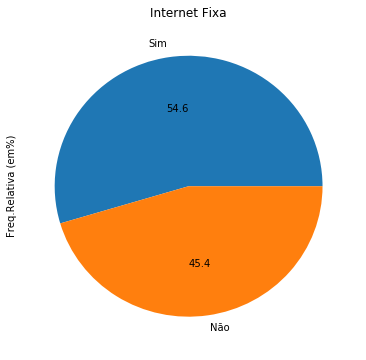

In [7]:
Internet2 = (df.Internet.value_counts(normalize=True)*100).round(decimals=1)
plot = Internet2.plot(kind='pie',title='Internet Fixa',autopct='%.1f',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em%)')

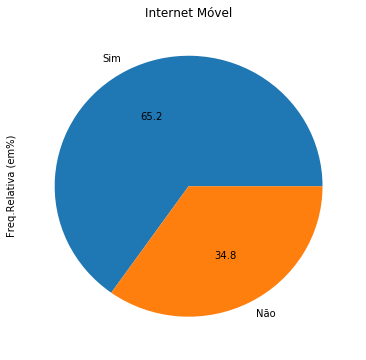

In [8]:
InternetMovel2 = (df['O acesso à 3G ou 4G'].value_counts(normalize=True)*100).round(decimals=1)
plot = InternetMovel2.plot(kind='pie',title='Internet Móvel',autopct='%.1f',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em%)')

# Análise e Resultados 2014


Os dados do ano de 2014 são extremamente similares aos de 2015 portanto as análises são as mesmas.

# 2013

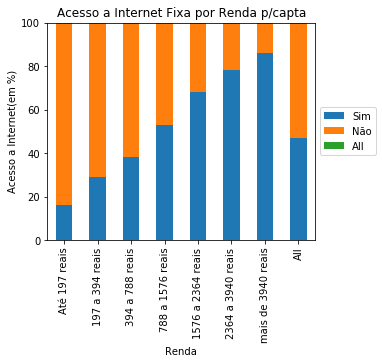

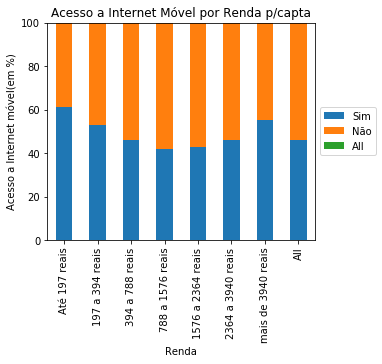

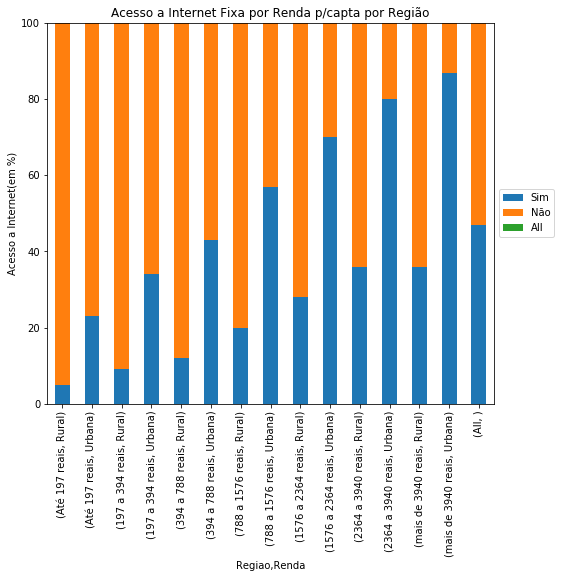

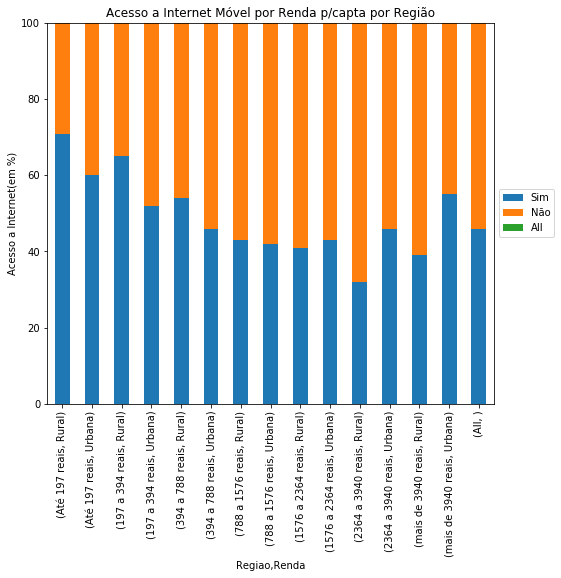

In [9]:
dados=pd.read_csv('DOM2013.csv',sep=',')
dados15=dados[(dados.V4622 > 0) & (dados.V4622 < 9)]

df=pd.DataFrame({'Renda':dados15.V4622,'Regiao':dados15.V4105,
                 'O acesso à 3G ou 4G':dados15.V02424,'Internet':dados15.V02322})
df.Internet = df.Internet.astype('category')
df.Renda = df.Renda.astype('category')
df.Renda.cat.categories=('Até 197 reais','197 a 394 reais','394 a 788 reais','788 a 1576 reais','1576 a 2364 reais','2364 a 3940 reais','mais de 3940 reais')
df['O acesso à 3G ou 4G'] = df['O acesso à 3G ou 4G'].astype('category')
df['O acesso à 3G ou 4G'].cat.categories = ('Sim','Não')
df.Internet.cat.categories = ('Sim','Não')
df.dropna()
df.Regiao=df.Regiao.apply(UrbanoRural)



def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)
ct=pd.crosstab(df.Internet,df.Renda,margins=True,rownames=['Internet'], colnames=['Renda']).apply(percConvert, axis=0)
ct = ct.iloc[0:5,:]
plot = ct.iloc[0:3,].T.plot(kind='bar', stacked=True,title='Acesso a Internet Fixa por Renda p/capta')
plot.set_ylim([0, 100])
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    


plt.ylabel('Acesso a Internet(em %)')
ct2=pd.crosstab(df['O acesso à 3G ou 4G'],df.Renda,margins=True,rownames=['Internet'], colnames=['Renda']).apply(percConvert, axis=0)
ct2 = ct2.iloc[0:5,:]
plot = ct2.iloc[0:3,].T.plot(kind='bar', stacked=True,title='Acesso a Internet Móvel por Renda p/capta')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet móvel(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ct3=pd.crosstab(df.Internet,[df.Renda,df.Regiao],margins=True,rownames=['Internet'], colnames=['Regiao','Renda']).apply(percConvert, axis=0)
ct3 = ct3.iloc[0:5,:]
ct3
plot = ct3.iloc[0:3,].T.plot(kind='bar',figsize=(10,7), stacked=True,title='Acesso a Internet Fixa por Renda p/capta por Região')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


ct4=pd.crosstab(df['O acesso à 3G ou 4G'],[df.Renda,df.Regiao],margins=True,rownames=['Internet'],colnames=['Regiao','Renda']).apply(percConvert, axis=0)
ct4 = ct4.iloc[0:5,:]
ct4
plot = ct4.iloc[0:3,].T.plot(kind='bar',figsize=(10,7), stacked=True,title='Acesso a Internet Móvel por Renda p/capta por Região')
plot.set_ylim([0, 100])
plt.ylabel('Acesso a Internet(em %)')
#Para legenda ficar fora do gráfico
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

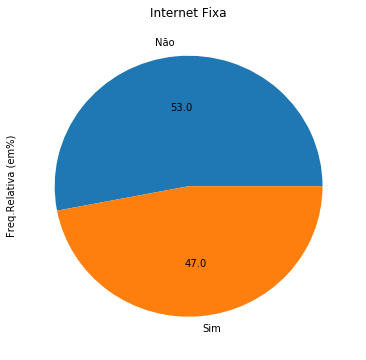

In [10]:
Internet3 = (df.Internet.value_counts(normalize=True)*100).round(decimals=1)
plot = Internet3.plot(kind='pie',title='Internet Fixa',autopct='%.1f',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em%)')

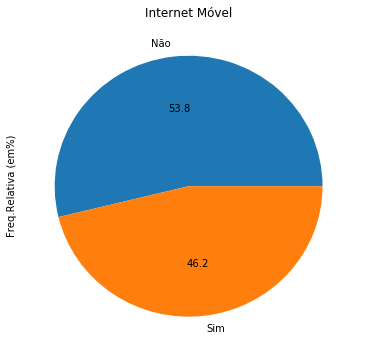

In [11]:
InternetMovel3 = (df['O acesso à 3G ou 4G'].value_counts(normalize=True)*100).round(decimals=1)
plot = InternetMovel3.plot(kind='pie',title='Internet Móvel',autopct='%.1f',figsize=(6, 6))
plt.ylabel('Freq.Relativa (em%)')

# Análise e Resultados 2013


Duas coisas são marcantes nos dados de 2013.

A primeira sem dúvida é o fato de que zonas rurais durante os anos e 2014 e 2015 tiveram um grande crescimento a respeito de o acesso a internet sendo ele móvel e fixo.

A segunda é o fato de que o acesso a internet era menos comum quando comparado com os outros anos, isso por que as faixas laranjas que mostram a ausência de acesso a internet são maiores que os outros anos. Outro fator que mostra que o acesso a internet aumentou de maneira significativa de 2013 a 2015 são os gráficos de setores que mostram que apesar da internet fixa ter aumentado uma porcentagem baixa os dados de internet móvel mostram que ocorreu um aumento de mais de 5% na área o que é um grande aumento considerando que são apenas o tempo que entre as duas pesquisas(3 anos).

___
## Conclusão 

    Acho que a maior conclusão que posso retirar deste projeto é a de que quando falamos de acesso a internet, devemos primeiramente diferenciar ela entre móvel e fixa, isso por que apesar delas parecerem similares, elas tem extrema divergência quando tratamos de dados.

### Existe relação entre rende e o acesso a internet fixa e móvel?

    Quando tratamos de internet fixa podemos sim afirmar que existe uma relação na qual pessoas mais pobres tem menos acesso do que pessoas mais ricas. No entanto tratando de internet móvel isso se modifica e é possível notar quase que uma uniformidade entre todas as rendas.

### Zonas Rurais tem menos acesso a internet fixa e móvel?
    Quando tratamos de internet fixa podemos novamente afirmar que as zonas rurais tem de fato menos acesso a rede. No entanto quando tratamos da internet móvel é possível notar que, em 2015 principalmente, a diferença neste fator entre as zonas urbanas e rurais e quase não existente.

### O acesso a internet cresceu de maneira expressiva durante os 3 anos examinados.
    A internet fixa não viu um grande crescimento permanecendo quase que constante pelos anos. No entanto o crescimento da internet móvel pode ser considerado expressivo, tendo uma variação de mais de 5% entre os anos de 2013 e 2015.

    
    